- 추가 3 : 쇼핑몰 판매량 데이터로 알아낼 수 있는 인사이트를 조원별로 구성하여 통합하라.

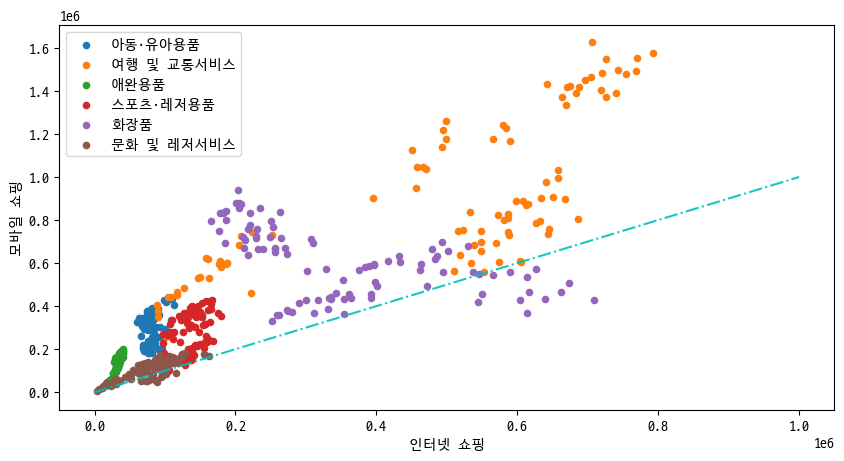

In [22]:
# 첫번째!!!

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

#font 설정 D2coding
d2_path ="./data ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

file_path = "./data ref/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")  # 인코딩 오류날까봐 미리 적어둠 ~

ori.columns = ["category","date","internet", "mobile"]

ori['date'] = ori['date'].map(lambda x: x.rstrip(' p)'))

ori['date']= pd.to_datetime(ori["date"],format='%Y.%m')
ori.dtypes

ex1_data = ori.copy()
obj = ['아동·유아용품','여행 및 교통서비스','애완용품','스포츠·레저용품','화장품','문화 및 레저서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]

fig, ax = plt.subplots(figsize=(10,5))

category = obj # ['아동·유아용품','여행 및 교통서비스','애완용품','스포츠·레저용품','화장품','문화 및 레저서비스']


for cate in obj:
    category_data = ex1_data[ex1_data['category']==cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data, s=20, label = cate)

ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")


ax.legend(loc="best")   # l e g e n d n e v e r d i e
ax.plot([0,1000000],[0,1000000], 'c-.', alpha=0.9)  # 선 길이가 1,000,000임~
# 선을 기준으로 위는 모바일 쇼핑, 아래는 인터넷 쇼핑~~
plt.show()
# print(category_data, x_data, y_data)

<알 수 있는 것>
- 대부분의 서비스가 모바일 쇼핑을 통해 결제되었다.
  > 사람들이 인터넷 쇼핑보다도 더 쉽게 접할 수 있는 모바일 쇼핑을 선호한다.
- 아동·유아용품의 소비보다 여행 및 교통서비스, 화장품의 소비가 더 두드러진다.
  > 여행 및 교통서비스, 화장품은 남녀노소 다 사용할 수 있으므로 오히려 소비량이 더 많이 집계되었나?
      > 출산율이 0.76에 불과하며, 아동 및 유아의 수가 상대적으로 적기 때문에 적게 집계되었다고도 볼 수 있다.
- 애완용품은 아동·유아용품의 쇼핑에 비해 적은 수가 집계되었다.
  > 아무래도 반려동물의 수가 아동·유아의 수보다 많지는 않을 것이다. 또한, 용품의 가짓수나 그 수도 아동·유아용품이
     훨씬 많을 것이라 사료된다.
- 스포츠·레저용품의 결제율이 문화 및 레저서비스의 결제율보다 높다.
  > 개인주의, 1인 가구가 많아진 현대사회에서 다함께 즐길 수 있는 서비스 보다는 용품을 구입해 혼자 즐기는 것을 선호하는
     사람들이 많아졌다고도 볼 수 있으며, 또한 예전 코로나의 영향으로 제공되는 서비스의 종류가 훨씬 줄었다고도 생각할 수 있다.

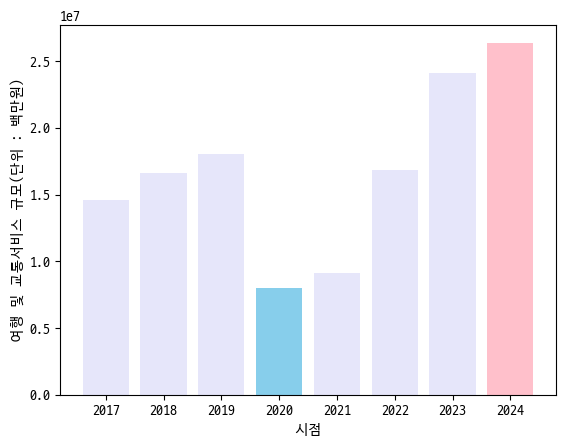

In [15]:
## 두번째 !!!!

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

#font 설정 D2coding
d2_path ="./data ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

file_path = "./data ref/온라인쇼핑몰_판매매체별_상품군별거래액_3.csv"
data = pd.read_csv(file_path,encoding="EUC-KR")
data.columns = ["date","category","total"]
data['date'] = data['date'].map(lambda x: x.rstrip(' p)'))

ex1_data = data.copy()
obj = ['2017','2018','2019','2020','2021','2022','2023','2024']
ex1_data = ex1_data[ex1_data['date'].isin(obj)]
ex1_data

max_value = max(ex1_data['total'])
min_value = min(ex1_data['total'])

color = ["pink" if value == max_value else "skyblue" if value == min_value else "lavender" for value in ex1_data['total']]
        
plt.bar(obj, ex1_data['total'], color=color)

# 축 레이블 설정
plt.xlabel("시점")
plt.ylabel("여행 및 교통서비스 규모(단위 : 백만원)")

# 그래프 보여주기
plt.show()

- 그래프를 봤을 때, 한창 코로나 감염이 높았던 시기인 2020년에 서비스 규모가 제일 낮고,
  코로나의 위험으로부터 벗어난 이후 점점 그 규모가 꾸준히 증가하여 2024년에 제일 높은 것으로 나타났다.